# Setup

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# import mpld3
# mpld3.enable_notebook()
# mpld3.disable_notebook()

In [2]:
import torch
torch.__version__

'1.1.0'

In [3]:
from torch import nn
from torch.nn import functional as F
import torchvision
from torchvision import models

In [4]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [5]:
import cv2
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import albumentations

In [6]:
matplotlib.__version__, albumentations.__version__

('3.0.3', '0.2.3')

# Train Models

In [7]:
import pandas as pd
from sklearn.model_selection import GroupKFold, KFold
import torch
from torch.optim import Adam
from torch.utils.data import DataLoader
from tensorboardX import SummaryWriter
import albumentations as albu

from am.segment.dataset import AMDataset, make_image_mask_dfs, load_ds, \
    train_transform, valid_transform, default_transform
from am.segment.loss import jaccard, CombinedLoss
from am.segment.model import UNet11, AlbuNet, UNet16
from am.segment.train import train_loop
from am.segment.utils import plot_images_row
from am.utils import plot_overlay

In [8]:
# train_ds.transform = valid_transform()

In [118]:
# Second stage pseudo labeling

# image_df, mask_df = make_image_mask_dfs(
#     Path('data/microscopy/20171106_Hepa_Nov_ANALYSIS_PAPER_pseudo_tiles'))

# # cv = GroupKFold(n_splits=2)
# # train_inds, valid_inds = next(cv.split(image_df, groups=image_df.group))

# # cv = KFold(n_splits=2, shuffle=True)
# # train_inds, valid_inds = next(cv.split(image_df))

# train_ds = AMDataset(image_df, mask_df,
#                      transform=train_transform())

# image_df, mask_df = make_image_mask_dfs(
#     Path('data/tiles/20171106_Hepa_Nov_ANALYSIS_PAPER'))

# valid_ds = AMDataset(image_df[image_df.group == 'FLi2'], mask_df[mask_df.group == 'FT1'],
#                      transform=valid_transform())
# len(train_ds), len(valid_ds)

In [119]:
# DAN GroupKFold validation

# image_df, mask_df = make_image_mask_dfs(
#     Path('data/microscopy/20171106_Hepa_Nov_ANALYSIS_PAPER_pseudo_tiles'))
# image_df.shape, mask_df.shape

# # cv = GroupKFold(n_splits=2)
# # train_inds, valid_inds = next(cv.split(image_df, groups=image_df.group))

# valid_groups = ['F1', 'FLi2']
# train_inds = image_df[~image_df.group.isin(valid_groups)].index.values
# valid_inds = image_df[image_df.group.isin(valid_groups)].index.values

# n = len(train_inds) // 2
# rand_inds = np.random.choice(train_inds, n, replace=False)
# train_ds = AMDataset(image_df.iloc[rand_inds], mask_df.iloc[rand_inds],
#                      transform=train_transform())

# n = len(valid_inds) // 2
# rand_inds = np.random.choice(valid_inds, n, replace=False)
# valid_ds = AMDataset(image_df.iloc[rand_inds], mask_df.iloc[rand_inds],
#                      transform=valid_transform())
# len(train_ds), len(valid_ds)

In [120]:
# Train on DAN validate on DHB

# image_df, mask_df = make_image_mask_dfs(
#     Path('data/microscopy/20171106_Hepa_Nov_ANALYSIS_PAPER_pseudo_tiles'))
# train_ds = AMDataset(image_df, mask_df,
#                      transform=train_transform())

# image_df, mask_df = make_image_mask_dfs(
#     Path('data/tiles/20180514_Coculture_PAPER'))
# valid_ds = AMDataset(image_df, mask_df,
#                      transform=valid_transform())
# len(train_ds), len(valid_ds)

In [121]:
# Test set predictions

# image_df, mask_df = make_image_mask_dfs(
#     Path('data/microscopy/20171106_Hepa_Nov_ANALYSIS_PAPER_pseudo_tiles'))

# train_ds = AMDataset(image_df, mask_df,
#                      transform=train_transform())

# image_df, mask_df = make_image_mask_dfs(
#     Path('data/tiles/20171106_Hepa_Nov_ANALYSIS_PAPER'))
# valid_ds = AMDataset(image_df[image_df.group == 'FB4'], mask_df[mask_df.group == 'FB4'],
#                      transform=valid_transform())
# len(train_ds), len(valid_ds)

In [122]:
# DHB GroupKFold validation

# image_df, mask_df = make_image_mask_dfs(
#     Path('data/tiles/20180514_Coculture_PAPER'))

# cv = GroupKFold(n_splits=2)
# train_inds, valid_inds = next(cv.split(image_df, groups=image_df.group))

# train_ds = AMDataset(image_df.iloc[train_inds], mask_df.iloc[train_inds],
#                      transform=train_transform())

# valid_ds = AMDataset(image_df.iloc[valid_inds], mask_df.iloc[valid_inds],
#                      transform=valid_transform())
# len(train_ds), len(valid_ds)

In [38]:
# import mlflow
# mlflow.set_experiment('optimize network arch and other hyperparameters')

In [39]:
# import cv2
# from am_segm.utils import read_image

In [40]:
# image = read_image('data/Crops of Exp9_P/source/well1/source.tif')
# image.shape

In [186]:
# DHB
# train_data_path = Path('data/20180514_Coculture_PAPER/source_pseudo_tiles')
# valid_data_path = Path('data/20180514_Coculture_PAPER/source_pseudo_tiles')

# DAN
# train_data_path = Path('data/20171106_Hepa_Nov_ANALYSIS_PAPER/pseudo_tiles')
# valid_data_path = Path('data/20171106_Hepa_Nov_ANALYSIS_PAPER/pseudo_tiles')

# train_ds = load_ds('data/20171106_Hepa_Nov_ANALYSIS_PAPER/manual_source_tiles',
#                    train_transform(),
#                    ['FT1', 'F1', 'U4'],
#                    ds_size=None)
# valid_ds = load_ds('data/20171106_Hepa_Nov_ANALYSIS_PAPER/manual_source_tiles',
#                    valid_transform(),
#                    ['FLi2'],
#                    ds_size=None)

# train_ds = load_ds('data/DHB_Crops_of_mouse_7-8/manual_tiles',
#                    train_transform(), [], size=30)
train_ds = load_ds('data/DHB_ds1/manual_tiles',
                   train_transform(), [], size=36)
train_ds += load_ds('data/DHB_ds2/manual_tiles',
                   train_transform(), [], size=36)
# train_ds += load_ds('data/DHB_ds2/pseudo_tiles',
#                     train_transform())
valid_ds = load_ds('data/DHB_ds2/source_tiles',
                   valid_transform(), ['7r'], size=None)

# train_data_path = Path('data/Crops of mouse 7-8/pseudo_tiles')
# valid_data_path = Path('data/Crops of mouse 7-8/pseudo_tiles')

# train_size = 64 if train_data_path.name == 'manual_tiles' else None
# train_size = None
# train_ds = load_ds('data/Crops of mouse 7-8/manual_tiles',
#                    train_transform(),
#                    [],
#                    ds_size=train_size)
# train_ds += load_ds('data/Crops of mouse 7-8/pseudo_tiles',
#                    train_transform(),
#                    [],
#                    ds_size=train_size)
# train_ds += load_ds('data/20171106_Hepa_Nov_ANALYSIS_PAPER/manual_tiles',
#                     train_transform(),
#                     [],
#                     ds_size=train_size)
# train_ds += load_ds('data/20171106_Hepa_Nov_ANALYSIS_PAPER/pseudo_tiles',
#                     train_transform(),
#                     ['U4', 'FB4', 'F1'],
#                     ds_size=train_size)

# train_no_tfm_ds = load_ds(train_data_path, None, train_groups, ds_size=train_size)
# valid_ds = load_ds('data/Crops of mouse 7-8/pseudo_tiles',
#                    valid_transform(),
#                    ['Well4_UL', 'Well4_LR'],
#                    ds_size=None)
# valid_ds = load_ds('data/20171106_Hepa_Nov_ANALYSIS_PAPER/source_tiles',
#                     valid_transform(),
#                     ['FT1'],
#                     ds_size=None)
len(train_ds), len(valid_ds)

(72, 225)

In [187]:
# inds = np.random.choice(valid_ds.image_df.shape[0], 12, replace=False)
# inds

In [188]:
# valid_ds.image_df.iloc[inds]

In [189]:
train_ds.image_df.group.unique(), valid_ds.image_df.group.unique()

(array(['1l', '7l', '5r'], dtype=object), array(['7r'], dtype=object))

In [190]:
# for (image, mask) in train_ds:
#     pass
# print(image.shape, mask.shape)
# print(image.max(), mask.max())

In [191]:
# plot_images_row([image, mask]);

Train data


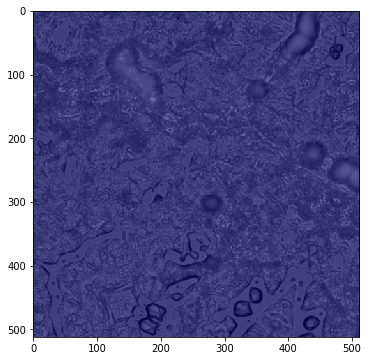

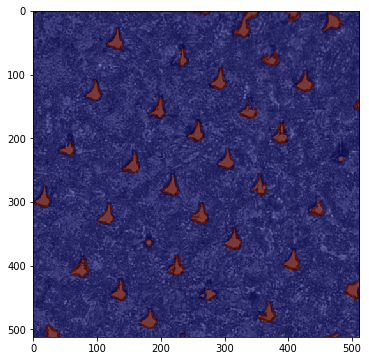

Valid data


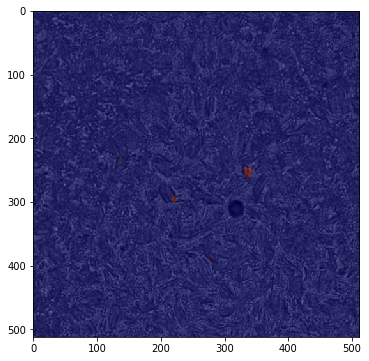

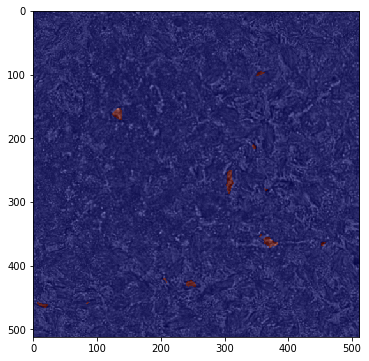

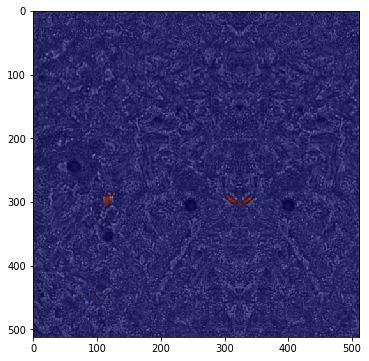

In [192]:
print('Train data')
n = 2
rinds = np.random.randint(0, len(train_ds), n)
for i in rinds:
    img, mask = train_ds[i]
#     img_no_tfm, _ = train_no_tfm_ds[i]
    fig = plot_overlay(img, mask, figsize=(6, 6))
#     fig = plot_images_row([img_no_tfm, img])
    plt.show()
#     if i == n - 1: break
    
print('Valid data')
n = 3
for i, (img, mask) in enumerate(valid_ds):
    plot_overlay(img, mask, figsize=(6, 6))
    plt.show()
    if i == n - 1: break

In [193]:
# batch_size = 12
batch_size = 4
train_dl = DataLoader(
    dataset=train_ds,
    shuffle=True,
    num_workers=4,
    batch_size=batch_size,
    pin_memory=torch.cuda.is_available()
)
if valid_ds:
    valid_dl = DataLoader(
        dataset=valid_ds,
        shuffle=True,
        num_workers=4,
        batch_size=batch_size,
        pin_memory=torch.cuda.is_available()
    )
else:
    valid_dl = None
len(train_dl), len(valid_dl) if valid_dl else 0

(18, 57)

In [194]:
# for input, target in train_dl:
#     pass
# input.min(), input.max()

In [173]:
# target.min(), target.max()

In [174]:
# lr = 1e-4
# n_epochs = 15

# # log_dir = 'runs/vgg16-jacc0.5'
# # writer = SummaryWriter(log_dir, flush_secs=1)
# writer = None

# # model = AlbuNet(pretrained=True)
# model = UNet16(pretrained=True)

# optimizer = Adam(model.parameters(), lr=lr)
# criterion = LossBinary(jaccard_weight=0.5)

# train_loop(model, train_dl, valid_dl,
#            optimizer, criterion,
#            n_epochs, writer)

In [175]:
import segmentation_models_pytorch as smp

# log_dir = 'runs/smp-se_resnext50_32x4d-jacc05'
# writer = SummaryWriter(log_dir, flush_secs=1)
writer = None

# n_epochs = 10
# lr_enc = 1e-4
# lr_dec = 3e-4

n_epochs = 10
lr_enc = 3e-4
lr_dec = 1e-3

model = smp.Unet(encoder_name='se_resnext50_32x4d', decoder_use_batchnorm=True)
# model = smp.Unet(encoder_name='resnet50', decoder_use_batchnorm=True)

optimizer = torch.optim.Adam([
    {'params': model.encoder.parameters(), 'lr': lr_enc},
    {'params': model.decoder.parameters(), 'lr': lr_dec},
])
criterion = CombinedLoss(bce_weight=0.5, jaccard=True, smooth=1e-15)

train_loop(model, train_dl, valid_dl,
           optimizer, criterion,
           n_epochs, writer)

Epoch 1/10
----------
..................
Train loss: 1.26454, train metric: 0.27849
.........................................................
Valid loss: 4.42930, valid metric: 0.12131
0 min 8 sec
Epoch 2/10
----------
..................
Train loss: 0.63669, train metric: 0.49410
.........................................................
Valid loss: 2.07544, valid metric: 0.03257
0 min 16 sec
Epoch 3/10
----------
..................
Train loss: 0.47145, train metric: 0.53358
.........................................................
Valid loss: 2.18833, valid metric: 0.02783
0 min 24 sec
Epoch 4/10
----------
..................
Train loss: 0.40687, train metric: 0.56614
.........................................................
Valid loss: 2.28925, valid metric: 0.02755
0 min 32 sec
Epoch 5/10
----------
..................
Train loss: 0.34805, train metric: 0.62051
.........................................................
Valid loss: 2.35482, valid metric: 0.02817
0 min 40 sec
Epoch 6/10


In [176]:
optimizer = torch.optim.Adam([
    {'params': model.encoder.parameters(), 'lr': lr_enc/3},
    {'params': model.decoder.parameters(), 'lr': lr_dec/3},
])
criterion = CombinedLoss(bce_weight=0.5, jaccard=True, smooth=1e-15)

train_loop(model, train_dl, valid_dl,
           optimizer, criterion,
           n_epochs=10)

Epoch 1/10
----------
..................
Train loss: 0.23132, train metric: 0.67399
.........................................................
Valid loss: 2.50044, valid metric: 0.03050
0 min 7 sec
Epoch 2/10
----------
..................
Train loss: 0.21866, train metric: 0.68258
.........................................................
Valid loss: 2.53642, valid metric: 0.02845
0 min 15 sec
Epoch 3/10
----------
..................
Train loss: 0.20788, train metric: 0.71563
.........................................................
Valid loss: 2.54433, valid metric: 0.02996
0 min 23 sec
Epoch 4/10
----------
..................
Train loss: 0.19955, train metric: 0.73431
.........................................................
Valid loss: 2.53688, valid metric: 0.03051
0 min 31 sec
Epoch 5/10
----------
..................
Train loss: 0.21015, train metric: 0.75398
.........................................................
Valid loss: 2.56546, valid metric: 0.02721
0 min 39 sec
Epoch 6/10


In [116]:
# optimizer = torch.optim.Adam([
#     {'params': model.encoder.parameters(), 'lr': lr_enc/9},
#     {'params': model.decoder.parameters(), 'lr': lr_dec/9},
# ])
# criterion = CombinedLoss(bce_weight=0.5, jaccard=True, smooth=1e-15)

# train_loop(model, train_dl, valid_dl,
#            optimizer, criterion,
#            n_epochs=10)

In [141]:
model_path = 'unet.pt'
torch.save(model.state_dict(), model_path)

In [53]:
# l = list(list(model.children())[0].children())[0][0]

In [54]:
# t = list(l.parameters())[0]

In [55]:
# t.data.dtype

In [56]:
# import segmentation_models_pytorch as smp

# n_epochs = 10
# lr_dec = 1e-4

# # log_dir = 'runs/smp-se_resnext50_32x4d-jacc05'
# # writer = SummaryWriter(log_dir, flush_secs=1)
# writer = None

# model = smp.Unet(encoder_name='se_resnext50_32x4d', decoder_use_batchnorm=True)

# optimizer = torch.optim.Adam([
#     {'params': model.decoder.parameters(), 'lr': lr_dec}, 
# ])
# criterion = LossBinary(jaccard_weight=0.5)

# train_loop(model, train_dl, valid_dl,
#            optimizer, criterion,
#            n_epochs, writer)

# n_epochs = 10
# lr_enc = 1e-4
# lr_dec = 1e-4

# optimizer = torch.optim.Adam([
#     {'params': model.encoder.parameters(), 'lr': lr_enc},
#     {'params': model.decoder.parameters(), 'lr': lr_dec}, 
# ])

# train_loop(model, train_dl, valid_dl,
#            optimizer, criterion,
#            n_epochs, writer)

In [57]:
# import segmentation_models_pytorch as smp

# n_epochs = 5
# lr_dec = 3e-4

# # log_dir = 'runs/smp-se_resnet50-jacc05'
# # writer = SummaryWriter(log_dir, flush_secs=1)
# writer = None

# model = smp.Unet(encoder_name='se_resnet50', decoder_use_batchnorm=True)

# optimizer = torch.optim.Adam([
#     {'params': model.decoder.parameters(), 'lr': lr_dec}, 
# ])
# criterion = LossBinary(jaccard_weight=0.5)

# train_loop(model, train_dl, valid_dl,
#            optimizer, criterion,
#            n_epochs, writer)

In [58]:
# import segmentation_models_pytorch as smp

# n_epochs = 10
# lr_enc = 1e-4
# lr_dec = 1e-4

# # log_dir = 'runs/smp-se_resnet50-jacc05'
# # writer = SummaryWriter(log_dir, flush_secs=1)
# writer = None

# # model = smp.Unet(encoder_name='se_resnet50', decoder_use_batchnorm=True)

# optimizer = torch.optim.Adam([
#     {'params': model.encoder.parameters(), 'lr': lr_enc},
#     {'params': model.decoder.parameters(), 'lr': lr_dec}, 
# ])
# criterion = LossBinary(jaccard_weight=0.5)

# train_loop(model, train_dl, valid_dl,
#            optimizer, criterion,
#            n_epochs, writer)

# Prediction

In [195]:
from am.segment.utils import convert_to_image, plot_images_row

def predict_plot(model, inputs, targets):
    targets_pred = torch.sigmoid(model(inputs.to('cuda')))
    
    n = min(len(inputs), len(targets))
    for i in range(n):
        plot_images_row([
            convert_to_image(targets[i]),
            convert_to_image(inputs[i]),
#             convert_to_image(targets_pred[i]),
#             (np.sqrt(convert_to_image(targets_pred[i])) > 0.5).astype(int),
            (convert_to_image(targets_pred[i]) > 0.5).astype(int)
        ], titles=['Labels', 'Inputs', 'Predicted', 'Pred mask'])

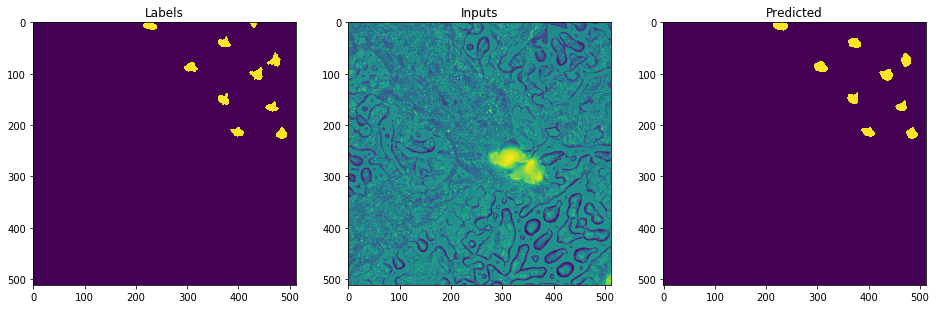

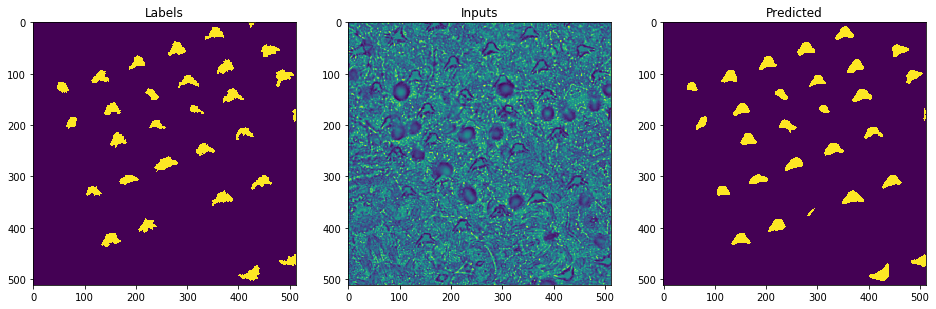

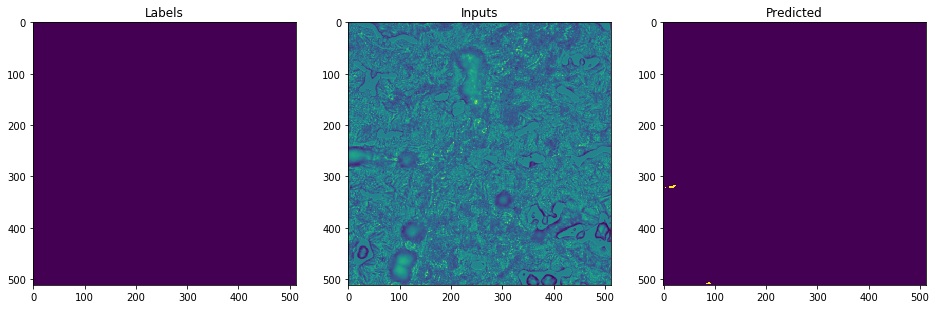

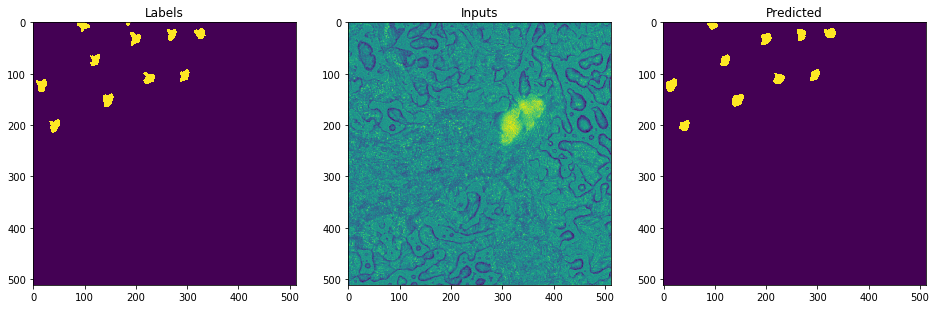

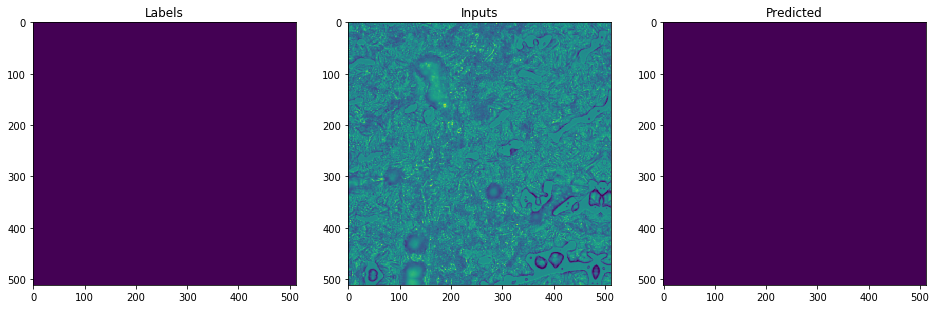

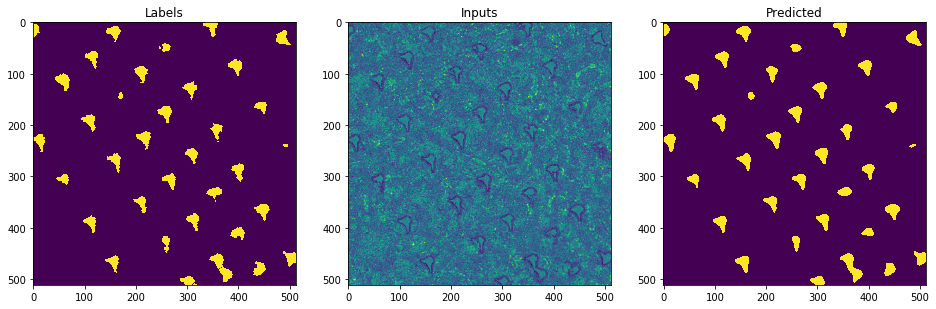

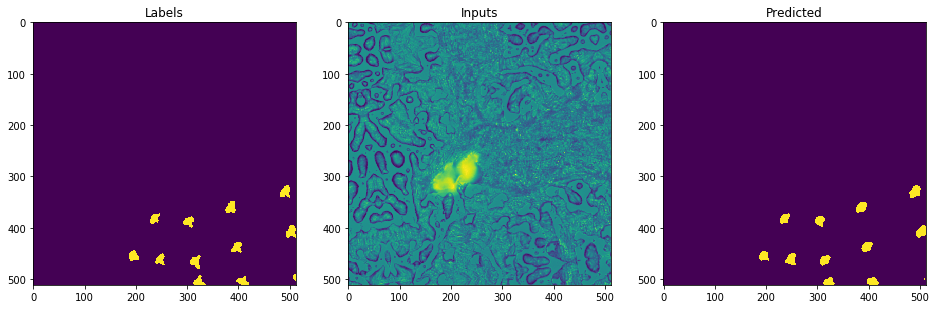

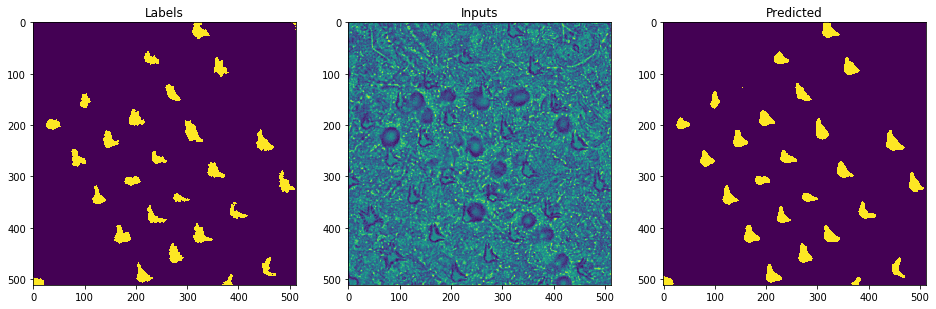

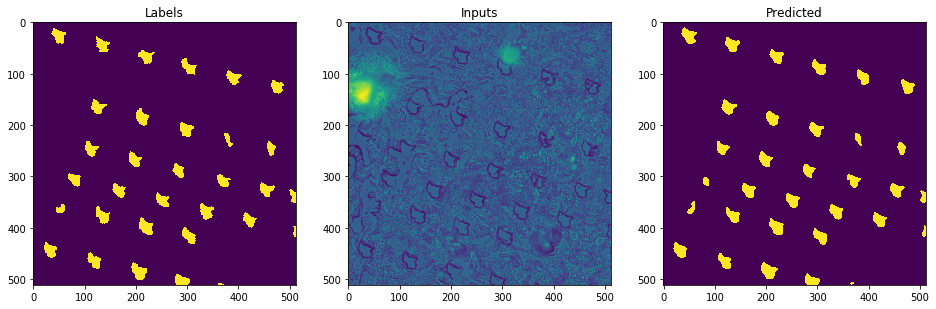

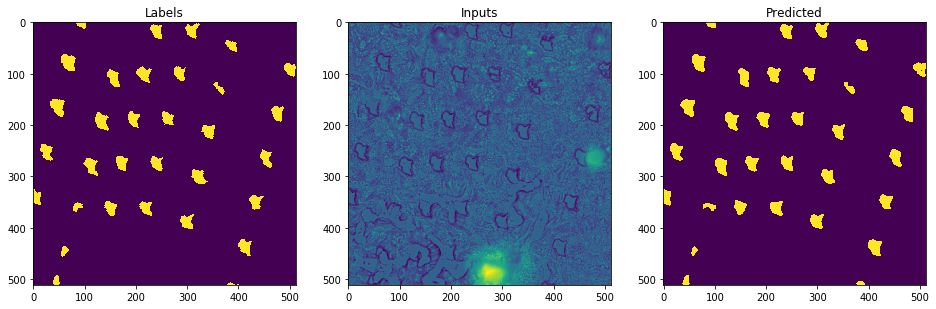

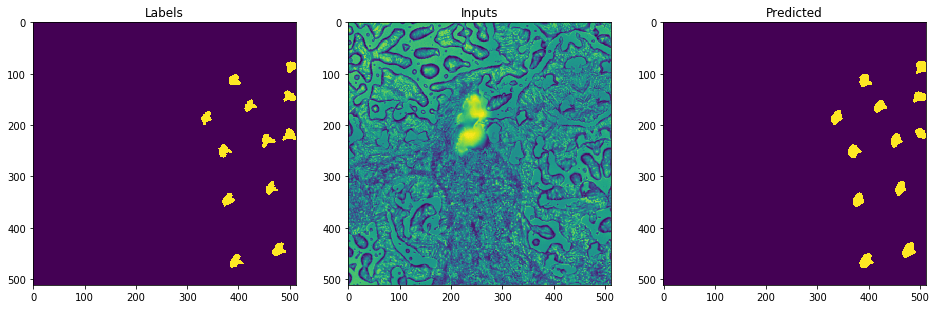

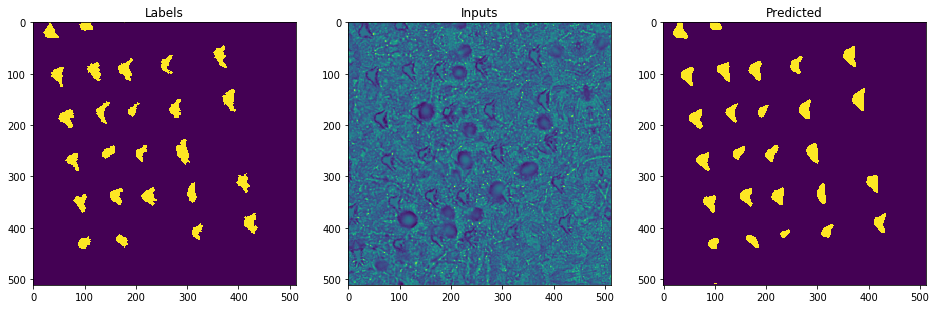

In [178]:
n = 3
for i, (inputs, targets) in enumerate(train_dl):
    predict_plot(model, inputs, targets)
    if i == n-1: break

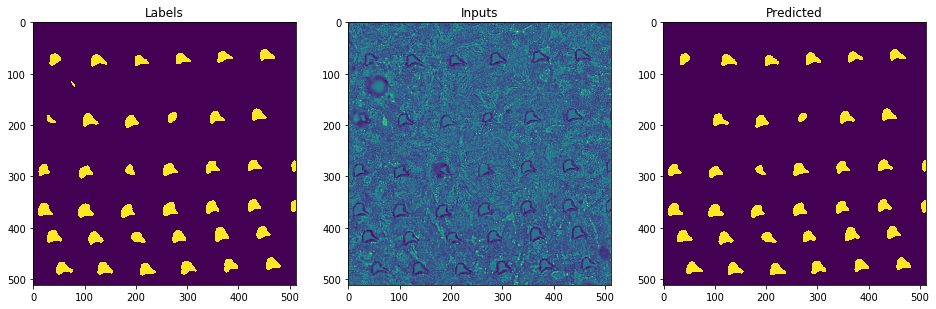

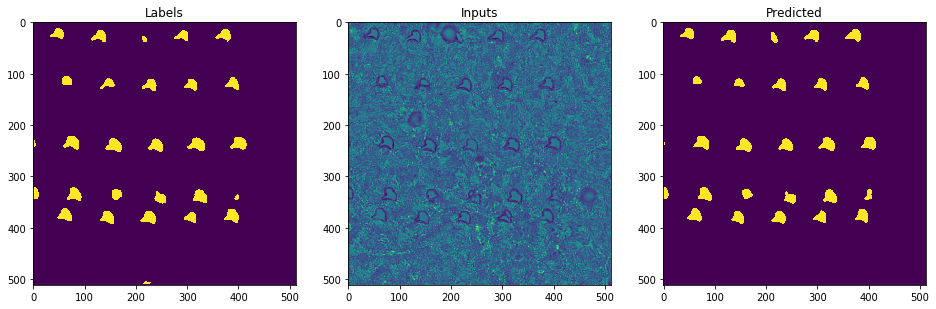

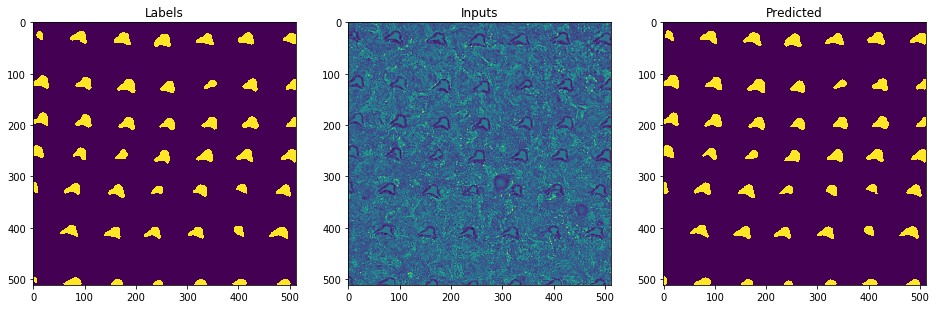

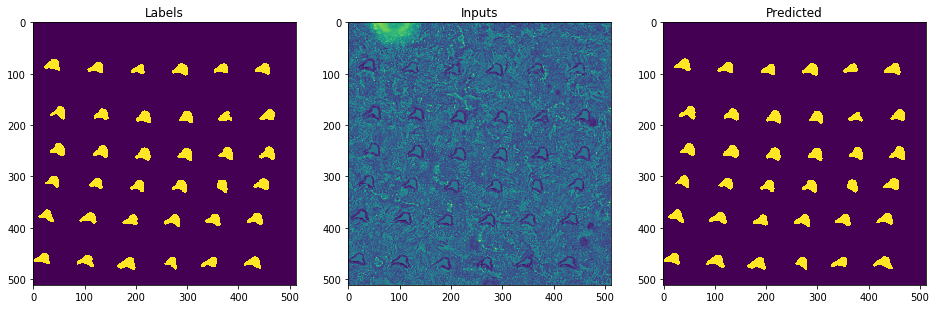

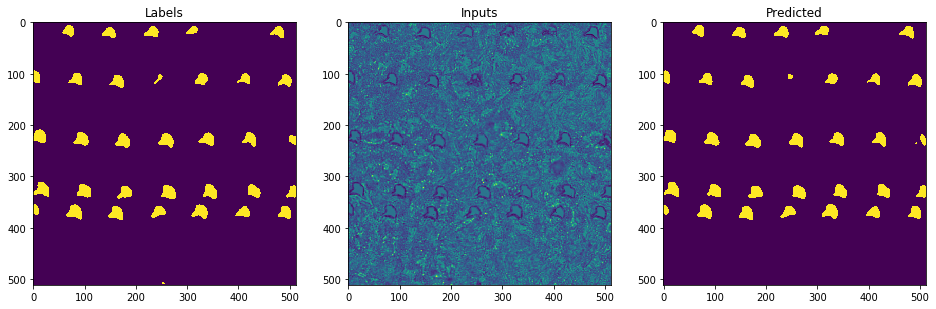

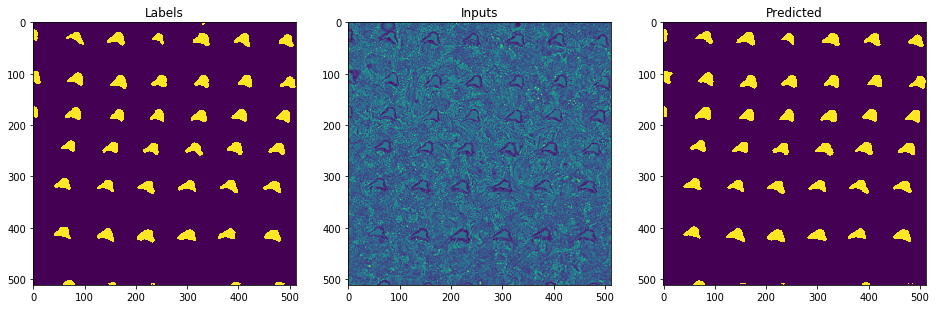

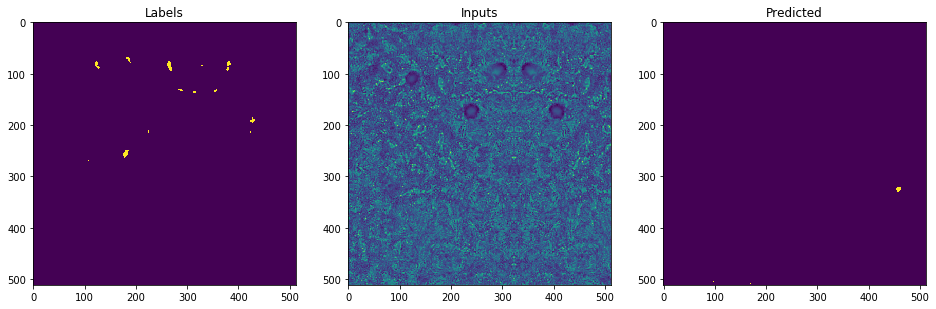

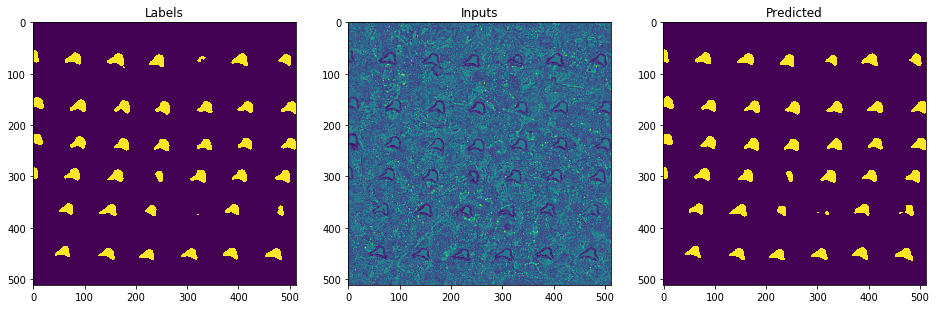

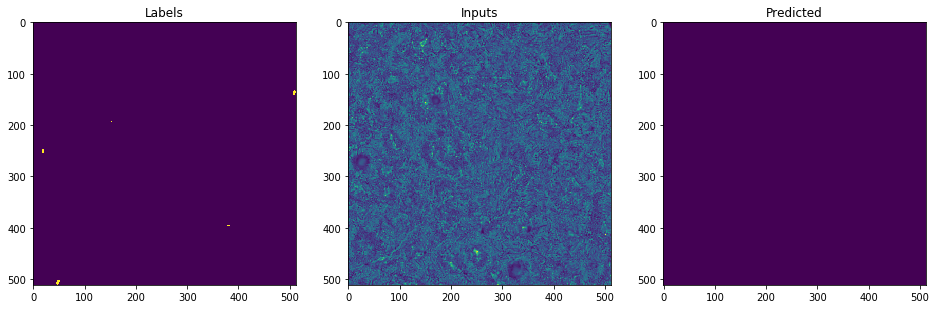

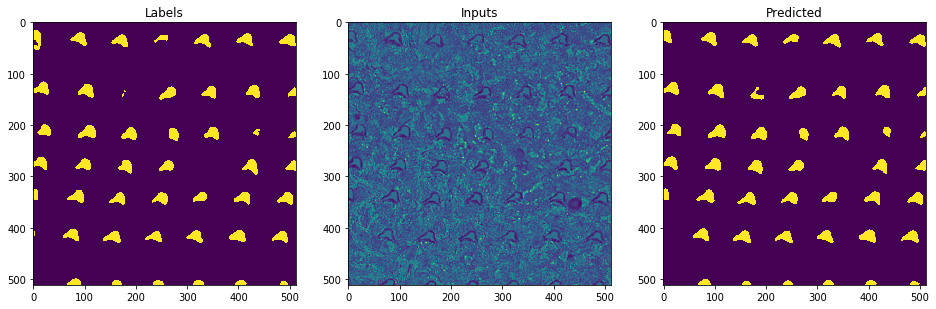

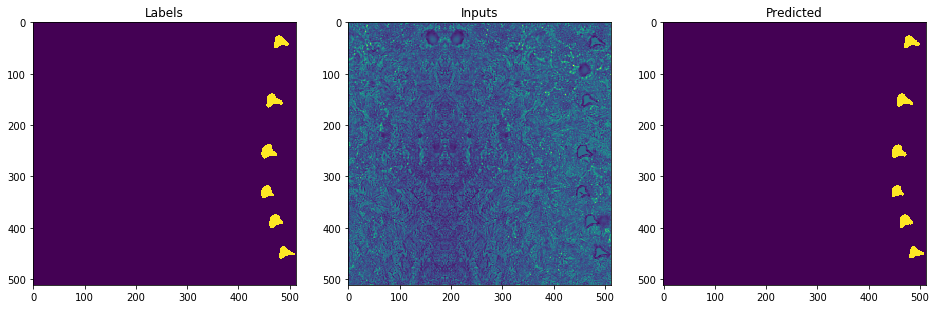

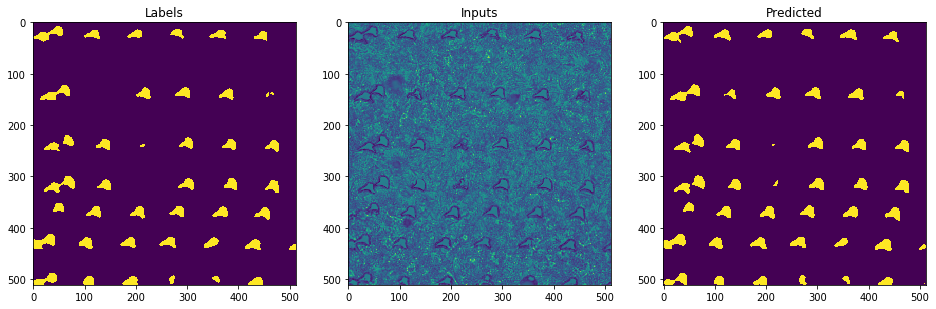

In [196]:
n = 3
for i, (inputs, targets) in enumerate(valid_dl):
    predict_plot(model, inputs, targets)
    if i == n - 1: break

# Save Predictions

In [197]:
import json
from shutil import copy, rmtree
from am.segment.predict import predict_save
from am.segment.preprocess import stitch_tiles_at_path
from am.utils import overlay_images_with_masks

In [198]:
# !cp -r data/DHB_ds1/source_tiles data/DHB_ds1/pseudo_tiles

In [200]:
# pred_path = Path('data/20171106_Hepa_Nov_ANALYSIS_PAPER/pseudo_tiles')
# pred_path = Path('data/20180514_Coculture_PAPER/pseudo_tiles')
# pred_path = Path('data/Crops of mouse 7-8/pseudo_tiles')
# pred_path = Path('data/Crops of Exp9_P/pseudo_tiles')
ds_path = Path('data/DHB_ds2')
ds = load_ds(ds_path / 'source_tiles', valid_transform())
predict_save(model, ds, ds_path / 'pseudo_tiles')

7r/15 batches processed
5r
7r
data/DHB_ds2/pseudo_tiles/7r/source/000.png
data/DHB_ds2/pseudo_tiles/7r/mask/000.png
data/DHB_ds2/pseudo_tiles/7r/source/001.png
data/DHB_ds2/pseudo_tiles/7r/mask/001.png
data/DHB_ds2/pseudo_tiles/7r/source/002.png
data/DHB_ds2/pseudo_tiles/7r/mask/002.png
data/DHB_ds2/pseudo_tiles/7r/source/003.png
data/DHB_ds2/pseudo_tiles/7r/mask/003.png
data/DHB_ds2/pseudo_tiles/7r/source/004.png
data/DHB_ds2/pseudo_tiles/7r/mask/004.png
data/DHB_ds2/pseudo_tiles/7r/source/005.png
data/DHB_ds2/pseudo_tiles/7r/mask/005.png
data/DHB_ds2/pseudo_tiles/7r/source/006.png
data/DHB_ds2/pseudo_tiles/7r/mask/006.png
data/DHB_ds2/pseudo_tiles/7r/source/007.png
data/DHB_ds2/pseudo_tiles/7r/mask/007.png
data/DHB_ds2/pseudo_tiles/7r/source/008.png
data/DHB_ds2/pseudo_tiles/7r/mask/008.png
data/DHB_ds2/pseudo_tiles/7r/source/009.png
data/DHB_ds2/pseudo_tiles/7r/mask/009.png
data/DHB_ds2/pseudo_tiles/7r/source/010.png
data/DHB_ds2/pseudo_tiles/7r/mask/010.png
data/DHB_ds2/pseudo_tile

data/DHB_ds2/pseudo_tiles/7r/mask/106.png
data/DHB_ds2/pseudo_tiles/7r/source/107.png
data/DHB_ds2/pseudo_tiles/7r/mask/107.png
data/DHB_ds2/pseudo_tiles/7r/source/108.png
data/DHB_ds2/pseudo_tiles/7r/mask/108.png
data/DHB_ds2/pseudo_tiles/7r/source/109.png
data/DHB_ds2/pseudo_tiles/7r/mask/109.png
data/DHB_ds2/pseudo_tiles/7r/source/110.png
data/DHB_ds2/pseudo_tiles/7r/mask/110.png
data/DHB_ds2/pseudo_tiles/7r/source/111.png
data/DHB_ds2/pseudo_tiles/7r/mask/111.png
data/DHB_ds2/pseudo_tiles/7r/source/112.png
data/DHB_ds2/pseudo_tiles/7r/mask/112.png
data/DHB_ds2/pseudo_tiles/7r/source/113.png
data/DHB_ds2/pseudo_tiles/7r/mask/113.png
data/DHB_ds2/pseudo_tiles/7r/source/114.png
data/DHB_ds2/pseudo_tiles/7r/mask/114.png
data/DHB_ds2/pseudo_tiles/7r/source/115.png
data/DHB_ds2/pseudo_tiles/7r/mask/115.png
data/DHB_ds2/pseudo_tiles/7r/source/116.png
data/DHB_ds2/pseudo_tiles/7r/mask/116.png
data/DHB_ds2/pseudo_tiles/7r/source/117.png
data/DHB_ds2/pseudo_tiles/7r/mask/117.png
data/DHB_ds2

data/DHB_ds2/pseudo_tiles/7r/mask/212.png
data/DHB_ds2/pseudo_tiles/7r/source/213.png
data/DHB_ds2/pseudo_tiles/7r/mask/213.png
data/DHB_ds2/pseudo_tiles/7r/source/214.png
data/DHB_ds2/pseudo_tiles/7r/mask/214.png
data/DHB_ds2/pseudo_tiles/7r/source/215.png
data/DHB_ds2/pseudo_tiles/7r/mask/215.png
data/DHB_ds2/pseudo_tiles/7r/source/216.png
data/DHB_ds2/pseudo_tiles/7r/mask/216.png
data/DHB_ds2/pseudo_tiles/7r/source/217.png
data/DHB_ds2/pseudo_tiles/7r/mask/217.png
data/DHB_ds2/pseudo_tiles/7r/source/218.png
data/DHB_ds2/pseudo_tiles/7r/mask/218.png
data/DHB_ds2/pseudo_tiles/7r/source/219.png
data/DHB_ds2/pseudo_tiles/7r/mask/219.png
data/DHB_ds2/pseudo_tiles/7r/source/220.png
data/DHB_ds2/pseudo_tiles/7r/mask/220.png
data/DHB_ds2/pseudo_tiles/7r/source/221.png
data/DHB_ds2/pseudo_tiles/7r/mask/221.png
data/DHB_ds2/pseudo_tiles/7r/source/222.png
data/DHB_ds2/pseudo_tiles/7r/mask/222.png
data/DHB_ds2/pseudo_tiles/7r/source/223.png
data/DHB_ds2/pseudo_tiles/7r/mask/223.png
data/DHB_ds2

data/DHB_ds2/pseudo_tiles/5r/mask/091.png
data/DHB_ds2/pseudo_tiles/5r/source/092.png
data/DHB_ds2/pseudo_tiles/5r/mask/092.png
data/DHB_ds2/pseudo_tiles/5r/source/093.png
data/DHB_ds2/pseudo_tiles/5r/mask/093.png
data/DHB_ds2/pseudo_tiles/5r/source/094.png
data/DHB_ds2/pseudo_tiles/5r/mask/094.png
data/DHB_ds2/pseudo_tiles/5r/source/095.png
data/DHB_ds2/pseudo_tiles/5r/mask/095.png
data/DHB_ds2/pseudo_tiles/5r/source/096.png
data/DHB_ds2/pseudo_tiles/5r/mask/096.png
data/DHB_ds2/pseudo_tiles/5r/source/097.png
data/DHB_ds2/pseudo_tiles/5r/mask/097.png
data/DHB_ds2/pseudo_tiles/5r/source/098.png
data/DHB_ds2/pseudo_tiles/5r/mask/098.png
data/DHB_ds2/pseudo_tiles/5r/source/099.png
data/DHB_ds2/pseudo_tiles/5r/mask/099.png
data/DHB_ds2/pseudo_tiles/5r/source/100.png
data/DHB_ds2/pseudo_tiles/5r/mask/100.png
data/DHB_ds2/pseudo_tiles/5r/source/101.png
data/DHB_ds2/pseudo_tiles/5r/mask/101.png
data/DHB_ds2/pseudo_tiles/5r/source/102.png
data/DHB_ds2/pseudo_tiles/5r/mask/102.png
data/DHB_ds2

data/DHB_ds2/pseudo_tiles/5r/mask/195.png
data/DHB_ds2/pseudo_tiles/5r/source/196.png
data/DHB_ds2/pseudo_tiles/5r/mask/196.png
data/DHB_ds2/pseudo_tiles/5r/source/197.png
data/DHB_ds2/pseudo_tiles/5r/mask/197.png
data/DHB_ds2/pseudo_tiles/5r/source/198.png
data/DHB_ds2/pseudo_tiles/5r/mask/198.png
data/DHB_ds2/pseudo_tiles/5r/source/199.png
data/DHB_ds2/pseudo_tiles/5r/mask/199.png
data/DHB_ds2/pseudo_tiles/5r/source/200.png
data/DHB_ds2/pseudo_tiles/5r/mask/200.png
data/DHB_ds2/pseudo_tiles/5r/source/201.png
data/DHB_ds2/pseudo_tiles/5r/mask/201.png
data/DHB_ds2/pseudo_tiles/5r/source/202.png
data/DHB_ds2/pseudo_tiles/5r/mask/202.png
data/DHB_ds2/pseudo_tiles/5r/source/203.png
data/DHB_ds2/pseudo_tiles/5r/mask/203.png
data/DHB_ds2/pseudo_tiles/5r/source/204.png
data/DHB_ds2/pseudo_tiles/5r/mask/204.png
data/DHB_ds2/pseudo_tiles/5r/source/205.png
data/DHB_ds2/pseudo_tiles/5r/mask/205.png
data/DHB_ds2/pseudo_tiles/5r/source/206.png
data/DHB_ds2/pseudo_tiles/5r/mask/206.png
data/DHB_ds2

In [ ]:
# %debug

In [ ]:
# i = -1
# image = image_list[i]
# mask = pred_list[i]
# image.shape, mask.shape

In [ ]:
# fig = plot_overlay(image, mask)

In [ ]:
meta_path = pred_path.parent / 'source_tiles'
stitch_tiles_at_path(pred_path, meta_path, True)

In [ ]:
# for group in unique_groups:
#     fig = overlay_group(pred_path.parent / 'pseudo_tiles_stitched' / group);

In [ ]:
# source_group_paths = .path.map(lambda p: p.parent.parent).unique().tolist()

In [ ]:
# for path in source_group_paths:
#     group = path.name
#     source_path = path / 'meta.json'
#     dest_path = pseudo_path / group / 'meta.json'
#     print(f'Copying {source_path} -> {dest_path}')
#     copy(source_path, dest_path)

In [ ]:
# ! ls -lah {pred_path / group}

# TTA Experiments

In [ ]:
import albumentations.augmentations.functional as F
from albumentations.pytorch.transforms import img_to_tensor

In [ ]:
normalize = albu.Normalize(p=1)

In [ ]:
i = 13
image_path = valid_ds.image_df.iloc[i].path
image = cv2.imread(str(image_path))
image.shape

In [ ]:
plt.imshow(image)

In [ ]:
# plt.imshow(F.hflip(image))

In [ ]:
plt.imshow(normalize.apply(image))

In [ ]:
# tta_tfm = [lambda im: im, F.hflip, F.vflip, lambda im: F.vflip(F.hflip(im))]
# tta_tfm = [
#     lambda im: im,
#     lambda im: albu.CLAHE()(image=im)['image']
# ]

# for _ in range(5):
#     plt.imshow(tfm.apply(image)[:,:,0])
#     plt.show()

In [ ]:

tensors = [img_to_tensor(normalize.apply(tfm.apply(image)['image'])) for tfm in tta_tfm]

In [ ]:
batch = torch.stack(tensors)
batch.shape

In [ ]:
probs = torch.sigmoid(model(batch.to('cuda')))
probs.shape

In [ ]:
# plt.imshow(convert_to_image(probs[0]))

In [ ]:
# plt.imshow(F.hflip(convert_to_image(probs[1])))

In [ ]:
pred_masks = [convert_to_image(prob) for prob in probs]
pred_mask_mean = np.mean(pred_masks, axis=0)
pred_mask_mean.shape

In [ ]:
image.shape

In [ ]:
fig = plot_images_row([image[:,:,0], pred_masks[0] > 0.5, pred_masks[1] > 0.5, pred_mask_mean > 0.5])

# Inference

In [ ]:
from segmentation.inference import SegmentationModel

In [ ]:
segm_model = SegmentationModel('unet.pth', tile_size=512)

In [ ]:
# pred_mask = segm_model.predict_mask('data/raw/n1_SELECTED/source.png')
pred_mask = segm_model.predict_mask('data/raw/AM_cropped_Rho.png')

In [ ]:
image = cv2.imread('data/raw/AM_cropped_Rho.png')
plot_image(image[1500:2000,1500:2000])

In [ ]:
plot_image(pred_mask[1500:2000,1500:2000])

In [ ]:
plot_image(pred_mask)

# Other